## Step 1: Import necessary libraries

In [65]:
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import HMDALoader
import pandas as pd
import numpy as np

## Step 2: Loading and Splitting the Dataset

In [126]:
# Load Dataset
filters = [('action_taken','==',1)] # ('state_code','==','DC'), ('loan_type','==',1),('loan_purpose','==',1),('loan_term','==','360')
X_columns = [
    'interest_rate',
    'loan_amount',
    'income',
    'combined_loan_to_value_ratio',
    'debt_to_income_ratio',
    'activity_year',
    'discount_points',
    'lender_credits',
    'loan_type',
    'loan_purpose',
    'purchaser_type',
    'loan_term',
]#,'county_code']
y_columns = ['lei']
dataset = HMDALoader.load_hmda_file(data_folder='data/clean', file_type='lar', min_year=2020, max_year=2020, filters=filters, columns=X_columns+y_columns)
dataset = dataset[X_columns+y_columns]

# Convert to numeric types
for col in X_columns:
    dataset[col] = pd.to_numeric(dataset[col], errors='coerce')

# Fill missing values with the mean of each column
for col in X_columns:
    dataset[col] = dataset[col].fillna(dataset[col].median())

# Drop missing values (should not be any)
dataset = dataset.dropna(subset=X_columns)

# Set X and y
X = dataset[X_columns].values
y = dataset[y_columns].values
del dataset

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Step 3: Fitting the model
This code creates an Isolation Forest classifier instance using the IsolationForest class. Contamination is a parameter that specifies the expected proportion of anomalies in the data. Here, it's set to 0.1 (10%).

In [132]:
# initialize and fit the model
clf = IsolationForest(contamination=0.0025, random_state=42, n_jobs=-1, n_estimators=100)

# Fit the model on the training data
clf.fit(X_train)

IsolationForest(contamination=0.0025, n_jobs=-1, random_state=42)

## Step 4: Predictions
The predict method returns labels indicating whether each data point is classified as normal (1) or anomalous (-1) by the model.

In [133]:
# predict the anomalies in the data
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
print(y_pred_train)
print(y_pred_test)

# Print mean of outlier classification
print(np.mean(y_pred_train))
print(np.mean(y_pred_test))

# Print value counts
print(pd.Series(y_pred_train).value_counts())
print(pd.Series(y_pred_test).value_counts())

# Predict Anomaly Probabilities
y_train_scores = clf.decision_function(X_train)
y_test_scores = clf.decision_function(X_test)

# Print mean of outlier scores
print(np.mean(y_train_scores))
print(np.mean(y_test_scores))


[1 1 1 ... 1 1 1]
[1 1 1 ... 1 1 1]
0.9949998697069421
0.9950277839707178
 1    10220517
-1       25616
Name: count, dtype: int64
 1    4380284
-1      10917
Name: count, dtype: int64
0.17677069609523624
0.17677038486689267


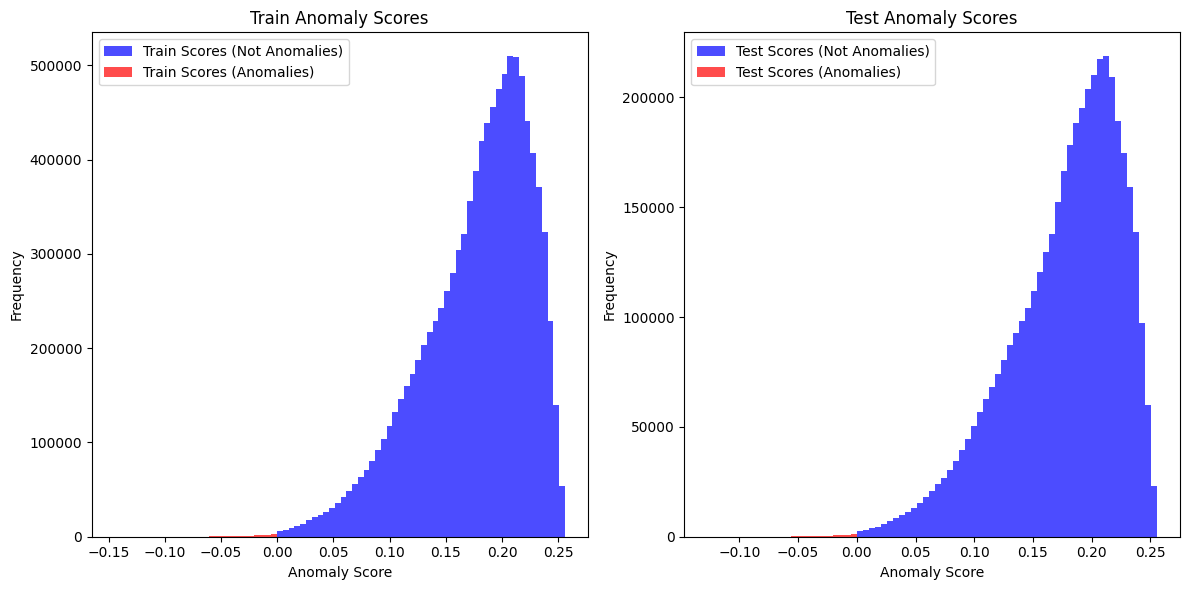

In [134]:
# Plot the distribution of outlier scores
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].hist(y_train_scores[y_pred_train==1], bins=50, color='blue', alpha=0.7, label='Train Scores (Not Anomalies)')
axes[0].hist(y_train_scores[y_pred_train==-1], bins=50, color='red', alpha=0.7, label='Train Scores (Anomalies)')
axes[0].set_title('Train Anomaly Scores')
axes[0].set_xlabel('Anomaly Score')
axes[0].set_ylabel('Frequency')
axes[0].legend()

axes[1].hist(y_test_scores[y_pred_test==1], bins=50, color='blue', alpha=0.7, label='Test Scores (Not Anomalies)')
axes[1].hist(y_test_scores[y_pred_test==-1], bins=50, color='red', alpha=0.7, label='Test Scores (Anomalies)')
axes[1].set_title('Test Anomaly Scores')
axes[1].set_xlabel('Anomaly Score')
axes[1].set_ylabel('Frequency')
axes[1].legend()
plt.tight_layout()
plt.show()


Step 4: Visualization

C:\Users\jonat\AppData\Local\Temp\ipykernel_34192\1284172274.py:48: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
c:\Users\jonat\Dropbox\personal\Documents\projects\hmda_data_manager\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


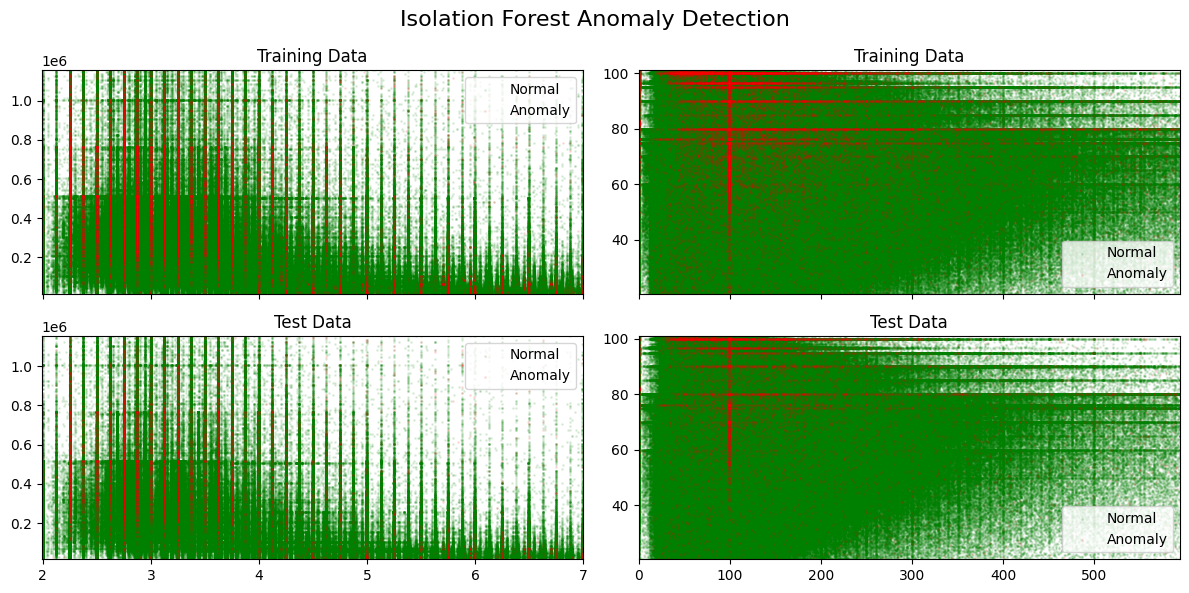

In [135]:
def create_scatter_plots(X1, y1, title1, X2, y2, title2):
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 6), sharex='col')

    # Set Limits for figures by truncating 1st and 99th percentiles
    x0_min = np.quantile(X1[:,0], .01)
    x0_max = np.quantile(X1[:,0], .99)
    x1_min = np.quantile(X1[:,1], .01)
    x1_max = np.quantile(X1[:,1], .99)
    x2_min = np.quantile(X1[:,2], .01)
    x2_max = np.quantile(X1[:,2], .99)
    x3_min = np.quantile(X1[:,3], .01)
    x3_max = np.quantile(X1[:,3], .99)

    # Scatter plot for the first set of data
    axes[0,0].scatter(X1[y1==1, 0], X1[y1==1, 1], color='green', label='Normal', s=1, alpha=0.1)
    axes[0,0].scatter(X1[y1==-1, 0], X1[y1==-1, 1], color='red', label='Anomaly', s=1, alpha=0.1)
    axes[0,0].set_title(title1)
    axes[0,0].set_xlim(x0_min, x0_max)
    axes[0,0].set_ylim(x1_min, x1_max)
    axes[0,0].legend()

    # Scatter plot for the second set of data
    axes[1,0].scatter(X2[y2==1, 0], X2[y2==1, 1], color='green', label='Normal', s=1, alpha=0.1)
    axes[1,0].scatter(X2[y2==-1, 0], X2[y2==-1, 1], color='red', label='Anomaly', s=1, alpha=0.1)
    axes[1,0].set_title(title2)
    axes[1,0].set_xlim(x0_min, x0_max)
    axes[1,0].set_ylim(x1_min, x1_max)
    axes[1,0].legend()

    # Scatter plot for the first set of data
    axes[0,1].scatter(X1[y1==1, 2], X1[y1==1, 3], color='green', label='Normal', s=1, alpha=0.1)
    axes[0,1].scatter(X1[y1==-1, 2], X1[y1==-1, 3], color='red', label='Anomaly', s=1, alpha=0.1)
    axes[0,1].set_title(title1)
    axes[0,1].set_xlim(x2_min, x2_max)
    axes[0,1].set_ylim(x3_min, x3_max)
    axes[0,1].legend()

    # Scatter plot for the second set of data
    axes[1,1].scatter(X2[y2==1, 2], X2[y2==1, 3], color='green', label='Normal', s=1, alpha=0.1)
    axes[1,1].scatter(X2[y2==-1, 2], X2[y2==-1, 3], color='red', label='Anomaly', s=1, alpha=0.1)
    axes[1,1].set_title(title2)
    axes[1,1].set_xlim(x2_min, x2_max)
    axes[1,1].set_ylim(x3_min, x3_max)
    axes[1,1].legend()

    # Display Plots
    plt.suptitle('Isolation Forest Anomaly Detection', fontsize=16)
    plt.tight_layout()
    plt.show()

# scatter plots
create_scatter_plots(X_train, y_pred_train, 'Training Data', X_test, y_pred_test, 'Test Data')

In [136]:
# Put Data Back in DataFrame
X_train_df = pd.DataFrame(X_train, columns=X_columns)
y_train_df = pd.DataFrame(y_train, columns=y_columns)
train_df = pd.concat([X_train_df, y_train_df], axis=1)
train_df['anomaly'] = y_pred_train
train_df['anomaly_score'] = y_train_scores
del X_train_df, y_train_df

X_test_df = pd.DataFrame(X_test, columns=X_columns)
y_test_df = pd.DataFrame(y_test, columns=y_columns)
test_df = pd.concat([X_test_df, y_test_df], axis=1)
test_df['anomaly'] = y_pred_test
test_df['anomaly_score'] = y_test_scores
del X_test_df, y_test_df

# Combine Train and Test DataFrames
train_df['i_Train'] = 1
combined_df = pd.concat([train_df, test_df], ignore_index=True)
combined_df['i_Train'] = combined_df['i_Train'].fillna(0)

# Get Anomaly Scores by LEI, and Count of Anomalies by LEI
combined_df['lei_anomaly_score'] = combined_df.groupby(['lei'])['anomaly_score'].transform('mean')
combined_df['lei_anomaly_count'] = combined_df.groupby(['lei'])['anomaly'].transform('sum')
combined_df['count_lei'] = combined_df.groupby(['lei'])['anomaly'].transform('count')

# Browse Anomalies by LEI
lei_df = combined_df[['lei','lei_anomaly_score','lei_anomaly_count','count_lei']].drop_duplicates()

anomalous = combined_df.query('lei_anomaly_score <= .01 & count_lei >= 10')

# Examine Bad Observations Systematically
## Fix Bad Observations by LEI (2018)
Based on our isolation forest exploration, we discover a few types of "bad" observations in the 2018 three-year data.
There are systematic mistakes in terms of incomes, interest rates, and discount points.

### Fix Bad Income Observations
#### Fix incomes expressed as raw, instead of 1000s
549300CCELEPUO4TOE73
2549001LVVJUGK9VA038
549300CKKPTDS03YHG30
5493000RRYPUX5O9MI08

### Fix Bad Interest Rate Observations
#### Fix interest rates expressed as raw, instead of percentage
549300CCELEPUO4TOE73

### Fix discount points observations
#### Fix leis where all discount points are 8888
549300JD2HS86SAFVA88

## Fix Bad Observations by LEI (2019)
### CLTV As decimal instead of percentage
2549001UO7C3LB3SXA82
MZJU01BGQ7J1KULQSB89
549300C8GOC4OYUV0Z32

### Large loan amounts (check not multifamily)
MZJU01BGQ7J1KULQSB89
B2S31CFVSWTN3FR00Q90

## Bad Observations by LEI (2020 Three Year File)
### Incomes expressed as raw
5493009TOEDMWVNG1442
54930057XF33SONJFP81 (some, not all)

### All one month terms
254900Z5QRSHW4Y8CR51

## Bad Observations by LEI (2022 One Year File)
### Incomes expressed as raw, monthly instead of rounded yearly
549300G3FCPL48R4HU28
5493009TOEDMWVNG1442

## Raw monthly incomes, not rounded yearly
984500DA79C1B97ACF16

### Loan Amount Possibly Multiplied by 100
B2S31CFVSWTN3FR00Q90

### All Large 40 year sent to GNMA (Possibly genuine)
5493002W52M3SYLFEX32
